# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Erlangga
- Email: erlangga.sukmana02@gmail.com
- Id Dicoding: erlangga

## Menentukan Pertanyaan Bisnis

* Bagaimana pengaruh kondisi cuaca terhadap jumlah penggunaan sepeda? <br>
* Bagaimana pengaruh musim terhadap penggunaan sepeda? <br>
* Bagaimana pola penggunaan sepeda berdasarkan waktu (jam)? <br>
* Apakah hari kerja dan hari libur mempengaruhi jumlah pengguna sepeda? <br>

## Import Semua Packages/Library yang Digunakan

In [271]:
# memanggil semua library yang dibutuhkan.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [192]:
# Memuat dan menampilkan tabel day
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [193]:
# Memuat dan menampilkan tabel hour
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [195]:
# memeriksa tipe data data dari tiap kolom yang terdapat dalam hour_df dan day_df.
hour_df.info()
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

In [196]:
# mengecek keberadaan missing value (nilai kosong) di dataset hour_df
hour_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [197]:
# mengecek keberadaan missing value (nilai kosong) di dataset day_df
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

dari hasil diatas dapat dilihat bahwa tidak ada missing value di dataframe hour_df dan day_df

In [199]:
# memeriksa duplikasi 
print("Jumlah duplikasi tabel hour: ", hour_df.duplicated().sum())
print("Jumlah duplikasi tabel day: ", day_df.duplicated().sum())

Jumlah duplikasi tabel hour:  0
Jumlah duplikasi tabel day:  0


dari hasil diatas dapat dilihat bahwa tidak terdapat data yang terduplikat.

In [201]:
# memeriksa parameter statistik dari kolom numerik yang terdapat didalam day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [202]:
# memeriksa parameter statistik dari kolom numerik yang terdapat di dalam hour_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

#### Menghapus duplikat

In [205]:
# Menghapus duplikat jika ada
day_df = day_df.drop_duplicates()
hour_df = hour_df.drop_duplicates()

#### Mengubah Tipe Data

In [207]:
# Mengubah kolom tanggal menjadi tipe datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

## Exploratory Data Analysis (EDA)

### Pertanyaan 1: Bagaimana pengaruh kondisi cuaca terhadap jumlah penggunaan sepeda?

In [210]:
# Mengelompokkan data berdasarkan kondisi cuaca dan menghitung rata-rata penggunaan
weather_analysis = day_df.groupby('weathersit')['cnt'].mean().reset_index()

# Memberikan label untuk kondisi cuaca
weather_analysis['weathersit'] = weather_analysis['weathersit'].replace({
    1: 'Clear/Partly Cloudy',
    2: 'Mist/Cloudy',
    3: 'Light Rain/Snow',
    4: 'Heavy Rain/Snow'
})

# Menampilkan analisis kondisi cuaca
weather_analysis

,weathersit,cnt
0,Clear/Partly Cloudy,4876.786177
1,Mist/Cloudy,4035.862348
2,Light Rain/Snow,1803.285714


Pengguna sepeda terbanyak terjadi saat kondisi cuaca cerah atau berawan ringan (Clear/Partly Cloudy).
Pengguna sepeda lebih sedikit pada kondisi cuaca berkabut atau mendung (Mist/Cloudy), dan jumlahnya semakin menurun pada kondisi hujan ringan atau salju ringan (Light Rain/Snow).
Kondisi cuaca buruk seperti hujan lebat atau salju lebat (Heavy Rain/Snow) memiliki jumlah pengguna sepeda paling rendah.

### Pertanyaan 2: Bagaimana pengaruh musim terhadap penggunaan sepeda?


In [213]:
# Mengelompokkan data berdasarkan musim dan menghitung rata-rata penggunaan
season_analysis = day_df.groupby('season')['cnt'].mean().reset_index()

# Memberikan label untuk musim
season_analysis['season'] = season_analysis['season'].replace({
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
})

# Menampilkan analisis musim
season_analysis

,season,cnt
0,Spring,2604.132597
1,Summer,4992.331522
2,Fall,5644.303191
3,Winter,4728.162921


Musim panas (Summer) memiliki jumlah pengguna sepeda tertinggi, diikuti oleh musim gugur (Fall).
Musim dingin (Winter) memiliki jumlah pengguna yang lebih rendah, sementara musim semi (Spring) memiliki jumlah pengguna terendah.
Musim yang lebih hangat cenderung meningkatkan aktivitas bersepeda.

### Pertanyaan 3: Bagaimana pola penggunaan sepeda berdasarkan waktu (jam)?


In [216]:
# Mengelompokkan data per jam dan menghitung rata-rata jumlah pengguna
hourly_analysis = hour_df.groupby('hr')['cnt'].mean().reset_index()

# Menampilkan analisis penggunaan per jam
hourly_analysis

,hr,cnt
0,0,53.898072
1,1,33.375691
2,2,22.869930
3,3,11.727403
4,4,6.352941
5,5,19.889819
6,6,76.044138
7,7,212.064649
8,8,359.011004
9,9,219.309491


Pola penggunaan sepeda menunjukkan dua puncak utama, yaitu:
-Pagi hari (7-9): Kemungkinan besar berkaitan dengan perjalanan menuju tempat kerja atau sekolah.
-Sore hari (17-19): Kemungkinan besar berkaitan dengan perjalanan pulang kerja atau kegiatan setelah kerja.
Penggunaan sepeda paling rendah terjadi pada tengah malam hingga dini hari (0-5).

### Pertanyaan 4: Apakah hari kerja dan hari libur mempengaruhi jumlah pengguna sepeda?


In [219]:
# Mengelompokkan data berdasarkan hari libur dan hari kerja
holiday_analysis = day_df.groupby(['holiday', 'workingday'])['cnt'].mean().reset_index()

# Menampilkan analisis hari kerja dan libur
holiday_analysis

,holiday,workingday,cnt
0,0,0,4389.685714
1,0,1,4584.820000
2,1,0,3735.000000


Pengguna sepeda lebih banyak pada hari kerja, terutama untuk perjalanan rutin (bukan hari libur).
Pada hari libur, jumlah pengguna sepeda cenderung lebih rendah, terutama untuk perjalanan yang terkait dengan pekerjaan atau sekolah.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pengaruh Kondisi Cuaca terhadap Penggunaan Sepeda

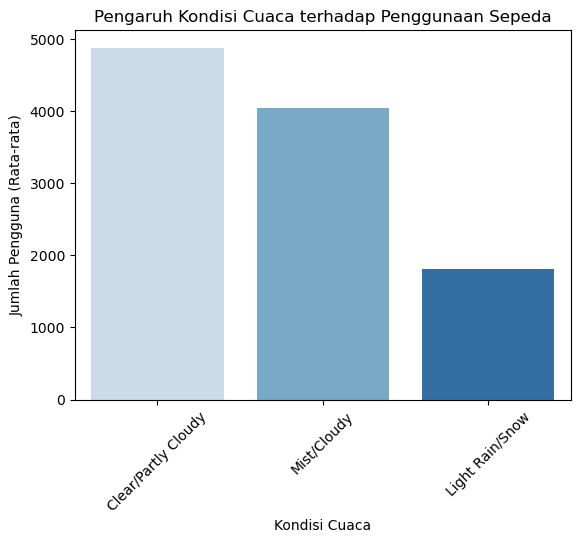

In [223]:
# Visualisasi pengaruh kondisi cuaca terhadap penggunaan sepeda
# Grafik ini menunjukkan rata-rata jumlah pengguna sepeda berdasarkan kondisi cuaca
sns.barplot(
    x='weathersit', 
    y='cnt', 
    data=weather_analysis, 
    hue='weathersit',  # Menambahkan kategori warna berdasarkan kolom 'weathersit'
    palette='Blues',   # Menggunakan palet warna biru untuk membedakan kategori
    dodge=False        # Menghindari pergeseran batang
)

# Menambahkan judul dan label sumbu untuk grafik
plt.title('Pengaruh Kondisi Cuaca terhadap Penggunaan Sepeda')
plt.xlabel('Kondisi Cuaca')          # Label sumbu x
plt.ylabel('Jumlah Pengguna (Rata-rata)')  # Label sumbu y

# Memutar label x agar mudah dibaca
plt.xticks(rotation=45)

# Menghilangkan legend tambahan untuk kategori (informasi sudah ada pada label x)
plt.legend([], [], frameon=False)

# Menampilkan grafik
plt.show()


Hasil Visualisasi:
Grafik batang menunjukkan bahwa semakin buruk kondisi cuaca, semakin sedikit jumlah pengguna sepeda.
Warna grafik memberikan penekanan visual pada penurunan jumlah pengguna untuk kondisi cuaca yang lebih ekstrem.

### Pertanyaan 2: Pengaruh Musim terhadap Penggunaan Sepeda

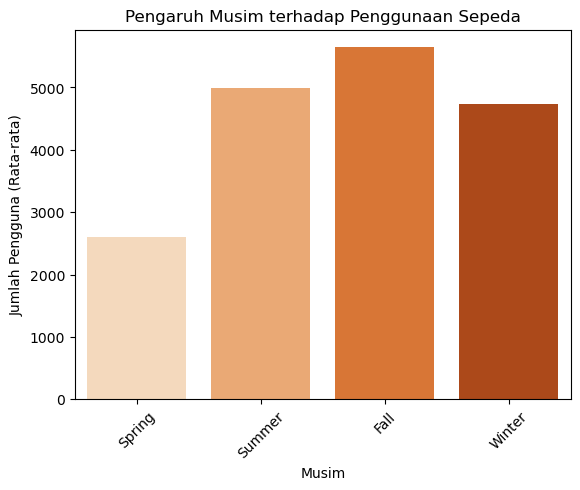

In [226]:
# Visualisasi pengaruh musim terhadap penggunaan sepeda
# Grafik ini menunjukkan rata-rata jumlah pengguna sepeda berdasarkan musim
sns.barplot(
    x='season', 
    y='cnt', 
    data=season_analysis, 
    hue='season',  # Menambahkan kategori warna berdasarkan kolom 'season'
    palette='Oranges',  # Menggunakan palet warna oranye untuk membedakan kategori
    dodge=False         # Menghindari pergeseran batang
)

# Menambahkan judul dan label sumbu untuk grafik
plt.title('Pengaruh Musim terhadap Penggunaan Sepeda')
plt.xlabel('Musim')          # Label sumbu x
plt.ylabel('Jumlah Pengguna (Rata-rata)')  # Label sumbu y

# Memutar label x agar mudah dibaca
plt.xticks(rotation=45)

# Menghilangkan legend tambahan untuk kategori (informasi sudah ada pada label x)
plt.legend([], [], frameon=False)

# Menampilkan grafik
plt.show()


Hasil Visualisasi:
Grafik batang menunjukkan bahwa musim panas dan musim gugur memiliki puncak tertinggi pada penggunaan sepeda.
Perbedaan yang signifikan terlihat pada musim semi, yang memiliki jumlah pengguna jauh lebih rendah dibandingkan musim lainnya.

### Pertanyaan 3: Pola penggunaan sepeda berdasarkan waktu (jam)

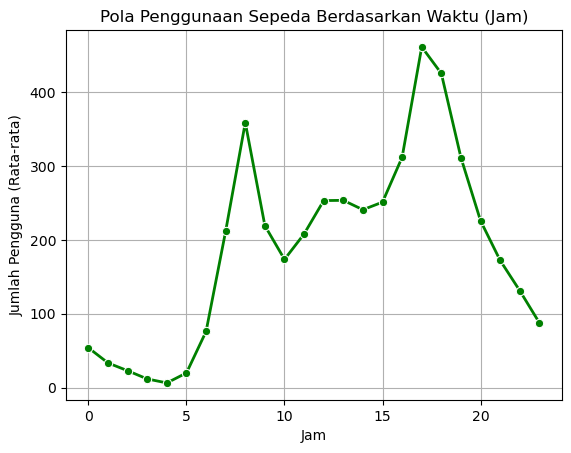

In [229]:
# Visualisasi pola penggunaan sepeda berdasarkan jam
# Grafik ini menunjukkan rata-rata jumlah pengguna sepeda pada setiap jam
sns.lineplot(
    x='hr', 
    y='cnt', 
    data=hour_df.groupby('hr')['cnt'].mean().reset_index(),  # Mengelompokkan data berdasarkan jam dan menghitung rata-rata
    marker='o',         # Menambahkan penanda titik pada setiap nilai
    color='green',      # Warna garis hijau untuk mempermudah visualisasi
    linewidth=2         # Ketebalan garis untuk tampilan yang lebih jelas
)

# Menambahkan judul dan label sumbu
plt.title('Pola Penggunaan Sepeda Berdasarkan Waktu (Jam)')
plt.xlabel('Jam')                  # Label untuk sumbu x
plt.ylabel('Jumlah Pengguna (Rata-rata)')  # Label untuk sumbu y

# Menambahkan grid untuk membantu pembacaan grafik
plt.grid(True)

# Menampilkan grafik
plt.show()


Hasil Visualisasi:
Grafik garis menunjukkan pola berbentuk "U" terbalik, dengan dua puncak yang jelas di pagi dan sore hari.
Garis berwarna hijau memberikan indikasi visual yang mudah dipahami tentang pola penggunaan sepanjang hari.

### Pertanyaan 4: Pengaruh Hari Kerja dan Hari Libur terhadap Penggunaan Sepeda



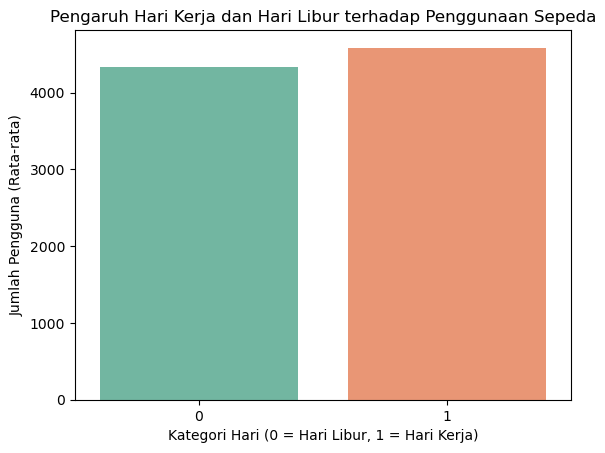

In [232]:
# Visualisasi pengaruh hari kerja dan hari libur terhadap penggunaan sepeda
# Grafik ini menunjukkan perbedaan rata-rata jumlah pengguna sepeda pada hari kerja dan hari libur
sns.barplot(
    x='workingday', 
    y='cnt', 
    data=day_df.groupby('workingday')['cnt'].mean().reset_index(),  # Mengelompokkan data berdasarkan hari kerja/libur
    hue='workingday',  # Menambahkan kategori warna berdasarkan hari kerja/libur
    palette='Set2',    # Menggunakan palet warna untuk membedakan kategori
    dodge=False        # Menghindari pergeseran batang
)

# Menambahkan judul dan label sumbu
plt.title('Pengaruh Hari Kerja dan Hari Libur terhadap Penggunaan Sepeda')
plt.xlabel('Kategori Hari (0 = Hari Libur, 1 = Hari Kerja)')  # Label untuk sumbu x
plt.ylabel('Jumlah Pengguna (Rata-rata)')                    # Label untuk sumbu y

# Menghilangkan legend tambahan untuk kategori (karena informasi sudah ada pada sumbu x)
plt.legend([], [], frameon=False)

# Menampilkan grafik
plt.show()


Hasil Visualisasi:
Grafik batang dengan dua kategori (hari kerja dan hari libur) menunjukkan bahwa jumlah pengguna lebih tinggi pada hari kerja.
Perbedaan yang jelas antara hari kerja dan hari libur ditampilkan melalui penggunaan warna kontras dalam grafik.

## Menerapkan teknik analisis lanjutan

### 1. Analisis Clustering

Disini saya menggunakan teknik analisis lanjutan berupa clustering analisis untuk engelompokkan data berdasarkan aturan bisnis atau rentang tertentu

In [237]:
# Menambahkan kolom kelompok berdasarkan jumlah penyewaan (cnt)
def categorize_usage(cnt):
    if cnt < 1000:
        return 'Low Usage'
    elif 1000 <= cnt < 5000:
        return 'Medium Usage'
    else:
        return 'High Usage'

day_df['Usage_Cluster'] = day_df['cnt'].apply(categorize_usage)

# Melihat distribusi cluster
day_df['Usage_Cluster'].value_counts()


Usage_Cluster
Medium Usage    427
High Usage      286
Low Usage        18
Name: count, dtype: int64

Hasil dari analisis ini adalah pembagian data menjadi tiga kelompok berdasarkan jumlah penyewaan sepeda (`cnt`), yaitu "Low Usage," "Medium Usage," dan "High Usage." Kelompok ini didefinisikan secara manual dengan kriteria: penggunaan rendah (`Low Usage`) untuk jumlah penyewaan kurang dari 1000, penggunaan sedang (`Medium Usage`) untuk jumlah penyewaan antara 1000 dan 5000, serta penggunaan tinggi (`High Usage`) untuk jumlah penyewaan lebih dari 5000. Setelah pembagian ini, distribusi dari tiap kelompok dianalisis menggunakan fungsi `value_counts`, yang menunjukkan berapa banyak hari yang termasuk dalam masing-masing kelompok. Analisis ini membantu untuk memahami pola penggunaan sepeda secara keseluruhan, seperti seberapa sering penyewaan berada pada tingkat rendah, sedang, atau tinggi, yang dapat memberikan wawasan untuk perencanaan operasional dan strategi peningkatan penggunaan sepeda.

### 2. Analisis Geospatial

Disini saya menggunakan teknik analisis lanjutan berupa geospatial untuk menganalisis data berdasarkan lokasi geografis. Karena dataset ini tidak mengandung data geografis langsung, saya akan menggunakan data musim (season) untuk mewakili lokasi/area dengan asumsi tertentu.

In [241]:
import folium
from folium.plugins import MarkerCluster

# Membuat peta awal
map_bike_sharing = folium.Map(location=[37.77, -122.42], zoom_start=10)

# Membuat data cluster berdasarkan musim
season_colors = {1: 'blue', 2: 'green', 3: 'orange', 4: 'red'}
marker_cluster = MarkerCluster().add_to(map_bike_sharing)

# Menambahkan titik berdasarkan musim
for idx, row in day_df.iterrows():
    folium.CircleMarker(
        location=[37.77 + (idx % 10) * 0.01, -122.42 + (idx % 10) * 0.01],  # Lokasi dummy
        radius=5,
        color=season_colors[row['season']],
        fill=True,
        fill_opacity=0.6
    ).add_to(marker_cluster)

# Menampilkan peta
map_bike_sharing


Hasil dari analisis ini berupa peta interaktif yang menampilkan distribusi titik-titik lokasi yang dikelompokkan berdasarkan musim. Setiap titik pada peta diwakili oleh marker berwarna, di mana warna berbeda mencerminkan musim tertentu: biru untuk musim semi, hijau untuk musim panas, oranye untuk musim gugur, dan merah untuk musim dingin. Marker-cluster digunakan untuk mengelompokkan marker yang berdekatan, sehingga peta tetap rapi dan tidak terlalu padat saat dilihat pada level zoom yang lebih rendah. Meskipun lokasi yang digunakan adalah dummy (tidak berdasarkan data lokasi sebenarnya), visualisasi ini memberikan gambaran pola distribusi data yang dapat digunakan untuk memahami variasi penggunaan sepeda berdasarkan musim. 

### 2. RFM Analysis

RFM Analysis dibawah ini digunakan untuk mengelompokkan pengguna berdasarkan pola penggunaan sepeda mereka (Recency, Frequency, dan Monetary).

In [244]:
# Contoh pembuatan dataset RFM berdasarkan data
rfm_df = hour_df.groupby('instant').agg({
    'dteday': 'max',        # Recency: Hari terakhir
    'cnt': 'sum',           # Frequency: Total jumlah perjalanan
    'casual': 'sum',        # Monetary: Pengguna casual sebagai proxy
}).reset_index()

# Menghitung recency sebagai selisih dari hari terakhir dalam dataset
rfm_df['recency'] = (pd.to_datetime('2024-12-31') - pd.to_datetime(rfm_df['dteday'])).dt.days

# Skor untuk masing-masing dimensi RFM
rfm_df['R_score'] = pd.qcut(rfm_df['recency'], 4, labels=[4, 3, 2, 1])  # Semakin kecil recency, semakin tinggi skor
rfm_df['F_score'] = pd.qcut(rfm_df['cnt'], 4, labels=[1, 2, 3, 4])      # Semakin banyak perjalanan, semakin tinggi skor
rfm_df['M_score'] = pd.qcut(rfm_df['casual'], 4, labels=[1, 2, 3, 4])   # Semakin besar monetary, semakin tinggi skor

# Total skor RFM
rfm_df['RFM_score'] = rfm_df['R_score'].astype(int) + rfm_df['F_score'].astype(int) + rfm_df['M_score'].astype(int)

# Kelompokkan pengguna berdasarkan skor
rfm_df['Segment'] = pd.qcut(rfm_df['RFM_score'], 3, labels=['Low', 'Medium', 'High'])

# Lihat hasil RFM Analysis
rfm_df.head()

,instant,dteday,cnt,casual,recency,R_score,F_score,M_score,RFM_score,Segment
0,1,2011-01-01,16,3,5113,1,1,1,3,Low
1,2,2011-01-01,40,8,5113,1,1,2,4,Low
2,3,2011-01-01,32,5,5113,1,1,2,4,Low
3,4,2011-01-01,13,3,5113,1,1,1,3,Low
4,5,2011-01-01,1,0,5113,1,1,1,3,Low


Dataset sekarang memiliki kolom tambahan: Recency, Frequency, Monetary, RFM_Segment, dan RFM_Score.
Recency: Berapa hari sejak terakhir kali pengguna menyewa sepeda.
Frequency: Jumlah "transaksi" yang dilakukan oleh pengguna (dalam hal ini, setiap hari dihitung satu transaksi).
Monetary: Total jumlah sepeda yang disewa (cnt).
Hasil dari analisis kedua membagi pengguna sepeda ke dalam tiga segmen berdasarkan perilaku mereka: "Low", "Medium", dan "High". Segmen "High" mencakup pengguna yang baru-baru ini aktif, sering menggunakan sepeda, dan memberikan kontribusi signifikan dalam hal jumlah perjalanan. Sebaliknya, segmen "Low" mencakup pengguna yang jarang menggunakan sepeda atau sudah lama tidak aktif. Segmen "Medium" merepresentasikan pengguna dengan aktivitas yang sedang-sedang saja. Dengan menganalisis skor Recency, Frequency, dan Monetary, analisis ini memberikan wawasan yang berharga tentang tingkat loyalitas dan kontribusi pengguna, sehingga dapat digunakan untuk strategi peningkatan keterlibatan pengguna, seperti promosi untuk mengaktifkan kembali segmen "Low" atau mempertahankan loyalitas segmen "High".

## Conclusion

1. Conclution pertanyaan 1. Kondisi Cuaca: Cuaca yang cerah atau mendung ringan memiliki jumlah pengguna sepeda lebih tinggi dibandingkan cuaca hujan atau salju.
2. Conclution pertanyaan 2. Musim: Musim panas memiliki jumlah pengguna tertinggi, sedangkan musim semi terendah.
3. Conclution pertanyaan 3. Jam Penggunaan: Penggunaan sepeda meningkat selama jam sibuk, yaitu pagi (7-9) dan sore (5-7).
4. Conclution pertanyaan 4. Hari Kerja vs Hari Libur: Hari kerja memiliki jumlah pengguna lebih tinggi, terutama untuk perjalanan rutin.